## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# Load dataset
df = pd.read_csv('ab_data.csv')

df.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
# Number of rows
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
# Number of unique user 
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
# Proportion of users converted == 1
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
# Show the number of times new_page and treatment unmatch
((df['group'] == "treatment") ^ (df['landing_page'] 
                                               == "new_page")).sum()

3893

f. Do any of the rows have missing values?

In [7]:
# Data properties and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


<span style="color:green">**The dataset has no null values.**</span>

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Drop all new_page and treatment unmatch
i = df[((df['group'] == "treatment") ^ (df['landing_page'] 
                                               == "new_page"))].index
df2 = df.drop(i)
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
# Number of unique user in new dataframe
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# View the repeated user_id
df2.loc[(df2.user_id.duplicated ()) == True].user_id

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
# View all information of repeated user_id
df2.loc[(df2.user_id.duplicated ()) == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
# Drop the repeated user_id
df2.drop_duplicates(inplace = True)

#Check Update 
(df2.duplicated ()).sum()

0

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
# P(converted)
(df2['converted']).mean()

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
#P(converted |control)
df2.query('group == "control"')['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
#P(converted |treatment)
df2.query('group == "treatment"')['converted'].mean()

0.11880724790277405

d. What is the probability that an individual received the new page?

In [17]:
# P(new_page)
(df2['landing_page'] == 'new_page').mean()

0.5000636646764286

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

<span style="color:green"> **The results above show there is no sufficient evidence to say the new page increase users' conversion. Furthermore, the probability of users' conversion in the control group is slightly higher than in the treatment group. The likelihood of receiving each version page is balanced makes it hard to conclude the new page leads to more conversions.**</span>

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**<center >$H_{0}$ : $p_{new}$ - $p_{old}$ $\leqslant$ 0</center>**
**<center>$H_{1}$ : $p_{new}$ - $p_{old}$ $>$ 0</center>**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [18]:
# Conversion rate for new page
convert_new = df2['converted'].mean()
convert_new

0.11959667567149027

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [19]:
# Conversion rate for old page
convert_old = df2['converted'].mean()
convert_old

0.11959667567149027

c. What is $n_{new}$, the number of individuals in the treatment group?

In [20]:
# Number of new page users
no_new = df2.query('landing_page == "new_page"').shape[0]
no_new

145311

d. What is $n_{old}$, the number of individuals in the control group?

In [21]:
# Number of old page users
no_old = df2.query('landing_page == "old_page"').shape[0]
no_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
# Create one simulation of size no_new (new page conversion)
new_page_converted = np.random.choice([0,1], no_new, 
                                      [(1-convert_new), convert_new]).mean()
new_page_converted

0.49997591372986216

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
# Create one simulation of size no_old (old page conversion)
old_page_converted = np.random.choice([0,1], no_old, 
                                      [(1-convert_old), convert_old]).mean()
old_page_converted

0.50029599240056721

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
# Calculate the difference in converted between the two pages
# of simulated data
new_page_converted - old_page_converted

-0.00032007867070504847

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [25]:
# Create simulation of difference in page conversion for 10000 times
p_diffs = []
new_page_converted = np.random.binomial(no_new, convert_new, 10000)/no_new
old_page_converted = np.random.binomial(no_old, convert_old, 10000)/no_old
p_diffs = new_page_converted - old_page_converted

# Convert List to array
p_diffs = np.array(p_diffs)
p_diffs

array([-0.00155834, -0.00049146,  0.00047877, ...,  0.00206153,
        0.00023785,  0.00127018])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [26]:
# Calculate actual difference from df2
obs_diff = df2[df2['group'] == 'treatment']['converted'].mean() -  df2[df2['group'] == 'control']['converted'].mean()
obs_diff

-0.0015790565976871451

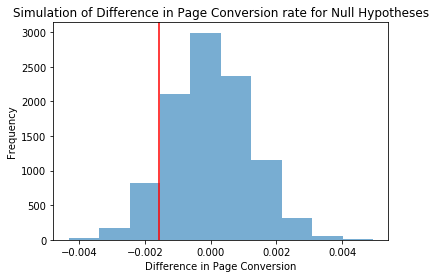

In [27]:
plt.hist(p_diffs, alpha = 0.6);
plt.axvline(x = obs_diff, color = 'red');
plt.title('Simulation of Difference in Page Conversion rate for Null Hypotheses');
plt.xlabel('Difference in Page Conversion');
plt.ylabel('Frequency');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
# Calculating p-value
(p_diffs > obs_diff).mean()

0.90449999999999997

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

<span style="color:green"> **The p-value was more than the stated type I error rate of 5% in the previous question. It fails to reject the null hypotheses, and the company should continue with its older page.** </span>


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [29]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page"')['converted'].sum()
convert_new = df2.query('landing_page == "new_page"')['converted'].sum()
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]


/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [30]:
# Calculate z-score and p-value
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
z_score, p_value

(-1.3116075339133115, 0.90517370514059103)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

<span style="color:green"> **z-score tells us how far the data point is from the mean by using standard deviation measurement. By looking at the results of p-value and z-score of statsmodel, the negative value and p-value tell us it fails to reject the null hypotheses, and it agrees with the finding in parts j and k.** </span>


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

<span style="color:green">**Logical regression as we have two possible outcomes.**</span>

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [31]:
# Change group column to dummy variables
df2['ab_page'] = pd.get_dummies(df['group'])['treatment']

# Add intercept column
df2['intercept'] = 1

df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [32]:
# Fit the model (log_mod)
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-08-20 00:26 AIC:              212780.6032
No. Observations:   290585           BIC:              212801.7625
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290583           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3116  0.1897  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

<span style="color:green">**The p-value of ab_page is 0.1897. It is still not rejecting the null hypotheses because it is greater than 5%. We could notice the result is lower than the one-sided t-test performed in part II, as the logical regression is a two-sided t-test.**</span>

<span style="color:green">**The logistic regression determines only two possible outcomes. We can state it in those formulas:**</span>

**<center >$H_{0}$ : $p_{new}$ - $p_{old}$ $=$ 0</center>**
**<center>$H_{1}$ : $p_{new}$ - $p_{old}$ $\neq$ 0</center>**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<span style="color:green">**In reality, many factors could affect the conversion of the new page—for example, age, culture, or gender.  But adding more factors to the regression means we will need more metrics to evaluate, which could lead to observe significant differences just by chance.**</span>

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [34]:
# Load user country data
df_countr= pd.read_csv('countries.csv')

df_countr.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [35]:
# Check unique country value
df_countr.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [36]:
# Join country dataframe with the df2
df_join = df_countr.set_index('user_id').join(df2.set_index('user_id')
                                              , how='inner')
df_join.head(10)

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,0,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1
630005,US,2017-01-17 21:22:25.940766,treatment,new_page,1,1,1
630006,US,2017-01-14 05:13:51.962356,treatment,new_page,0,1,1
630008,US,2017-01-11 16:11:11.131461,control,old_page,0,0,1
630009,US,2017-01-05 23:35:15.820565,control,old_page,1,0,1


In [37]:
# Change country column to dummy variables
df_join[['UK','US']] = pd.get_dummies(df_join['country'])[['UK','US']]
df_join.head(10)

,country,timestamp,group,landing_page,converted,ab_page,intercept,UK,US
user_id,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,0,1,0,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,1
630005,US,2017-01-17 21:22:25.940766,treatment,new_page,1,1,1,0,1
630006,US,2017-01-14 05:13:51.962356,treatment,new_page,0,1,1,0,1
630008,US,2017-01-11 16:11:11.131461,control,old_page,0,0,1,0,1
630009,US,2017-01-05 23:35:15.820565,control,old_page,1,0,1,0,1


In [38]:
# Fit the model (log_mod2)
log_mod2 = sm.Logit(df_join['converted'], df_join[['intercept','ab_page','UK','US']])
results = log_mod2.fit()


Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


In [39]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-08-20 00:27 AIC:              212781.3782
No. Observations:   290585           BIC:              212823.6968
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2486  0.0000  -2.0822  -1.9778
ab_page       -0.0150    0.0114   -1.3076  0.1910  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5159  0.1296  -0.0119   0.0934
==================================================================

"""

<span style="color:green">**The result shows that the p-value of both countries is not statistically significant (p-value greater than 5%), meaning there is no relation between Countries and the conversion rates for different pages. So, we failed to reject the null hypotheses.**</span>

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [40]:
# Add additional columns specifying what user in each country converted
df_join['ab_UK'] = df_join['ab_page'] * df_join['UK']
df_join['ab_US'] = df_join['ab_page'] * df_join['US']
df_join.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,UK,US,ab_UK,ab_US
user_id,,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,1,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,1,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,0,1,0,1,0,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,1,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,1,0,1


In [41]:
# Fit the model (log_mod3)
log_mod3 = sm.Logit(df_join['converted'], df_join[['intercept','ab_page','UK','US','ab_UK','ab_US']])
results = log_mod3.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-08-20 00:27 AIC:              212782.9124
No. Observations:   290585           BIC:              212846.3903
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290579           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
ab_UK          0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
ab_US          0.0469    0.0538    0.8716  0.3834  -0.0585   0.1523
==================================================================

"""

<span style="color:green">**Again, the p-value of all the variables is higher than 5%; we can state that interactions between page and country have no significant effects on conversion.**</span>

<a id='conclusions'></a>
## Conclusion

<span>In conclusion of this project, it would appear from the result that we do not have sufficient evidence to recommend that the new page results in more conversions than the old one.</span>

<span>There could be other variables regarding users which could result in rejecting the null hypothesis. However, looking at the analysis results, I suggest keeping the old page rather than the new one, as it does not bring much value and save time and money.</span>
 
## Directions to Submit


In [43]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0